In [66]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
# from collections import defaultdict

# from sklearn.model_selection import train_test_split 
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from lightgbm.sklearn import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

import preprocessing as pp
import PCA_data as pca_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import altair as alt
# alt.renderers.enable('notebook')
# alt.data_transformers.disable_max_rows()

In [3]:
df = pd.read_csv("../data/train_data.zip")
df.head()

,external_id,month,year,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,...,avg_wind_9_10,avg_wind_10_11,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita
0,1807558,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,37.0,418.67,0.116368,0.025516,0.090852
1,1806729,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,63.0,710.00,0.175774,0.020170,0.155604
2,MR00096403,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,241.24,0.112038,0.006893,0.105145
3,1806350,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,45.0,468.51,0.120088,0.003619,0.116469
4,FM00169477,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,83.0,326.05,0.132935,0.025298,0.107637


In [3]:
# clean_df = pp.preprocessing_na(df)
# clean_df.shape

(50120, 813)

In [4]:
# clean_df2 = pp.clean_categorical(clean_df.drop(columns = ['external_id', 'state']))
# clean_df2.shape

(50120, 817)

In [6]:
# df_biba = clean_df2.loc[:, 'monthly_number_of_sessions':'monthly_Sunday']
# df_biba.shape

(50120, 246)

In [58]:
df_biba = pd.concat([df.iloc[:, 0:132], df.iloc[:, 673:793]], axis = 1)
df_biba.head()

,external_id,month,year,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,...,historic_ws_6_to_8,historic_ws_8_to_10,historic_ws_10_to_12,historic_ws_12_to_14,historic_ws_14_to_16,historic_ws_above_16,historic_rain,historic_clear,historic_foggy,historic_snow
0,1807558,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,0.0,0.0
1,1806729,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MR00096403,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,4.0,1.0,NaN,1.0,NaN,NaN,0.0,8.0,0.0,0.0
3,1806350,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FM00169477,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_biba.columns[173:219]

Index(['historic_count_bridge', 'historic_count_bridge_bars',
       'historic_count_bridge_plank', 'historic_count_bridge_rope',
       'historic_count_climber', 'historic_count_climber_moulded',
       'historic_count_climber_playcube', 'historic_count_climber_rock',
       'historic_count_climber_rope', 'historic_count_climber_step',
       'historic_count_in_climbs_moon', 'historic_count_in_climbs_triangle',
       'historic_count_in_climbs_tube', 'historic_count_in_crawls_90tube',
       'historic_count_in_crawls_cave', 'historic_count_in_crawls_spider',
       'historic_count_in_crawls_tube', 'historic_count_in_obsta_ball',
       'historic_count_in_obsta_horiz_squeeze',
       'historic_count_in_obsta_pendulum', 'historic_count_in_obsta_punchbag',
       'historic_count_in_obsta_stump', 'historic_count_in_obsta_vert_squeeze',
       'historic_count_in_slides_drop', 'historic_count_in_slides_spiral',
       'historic_count_in_slides_tube', 'historic_count_in_slides_wave',
       

In [46]:
df_biba.columns[0:35]

Index(['monthly_number_of_sessions', 'monthly_unique_sessions',
       'monthly_repeated_sessions', 'monthly_avg_length_of_session',
       'monthly_avg_light_activity', 'monthly_avg_moderate_activity',
       'monthly_avg_vigorous_activity', 'monthly_count_slide_single',
       'monthly_count_climber_rope', 'monthly_count_slide_covered',
       'monthly_count_slide', 'monthly_count_tube',
       'monthly_count_tube_straight', 'monthly_count_climber_step',
       'monthly_count_overhang_bars', 'monthly_count_climber_rock',
       'monthly_count_slide_spiral', 'monthly_count_slide_roller',
       'monthly_count_ramp', 'monthly_count_zipline', 'monthly_count_spinner',
       'monthly_count_bridge_plank', 'monthly_count_swing_seated',
       'monthly_count_bridge_rope', 'monthly_count_bridge_bars',
       'monthly_count_slide_multi', 'monthly_count_swing_tire',
       'monthly_count_climber_moulded', 'monthly_count_overhang_rings',
       'monthly_count_tube_curved', 'monthly_count_climbe

In [7]:
equipments = ['slide', 'climb', 'tube', 'overhang', 'bridge', 'swing', 'obsta', 'crawls']

In [8]:
slides = [i for i in df_biba.columns if re.match('monthly_.*slide.*', i)]
slides

['monthly_count_slide_single',
 'monthly_count_slide_covered',
 'monthly_count_slide',
 'monthly_count_slide_spiral',
 'monthly_count_slide_roller',
 'monthly_count_slide_multi']

In [9]:
#creating list of columns to combine 
new_cols_list = {}

for eqpmnt in equipments:
    new_cols_list["monthly_"+eqpmnt] = [i for i in df_biba.columns if re.match('monthly_.*'+eqpmnt+'.*', i)]
    new_cols_list["historic_"+eqpmnt] = [i for i in df_biba.columns if re.match('historic_.*'+eqpmnt+'.*', i)]
    if new_cols_list["monthly_"+eqpmnt]==[]:
        new_cols_list.pop("monthly_"+eqpmnt)

In [10]:
for key, val in new_cols_list.items():
    df_biba[key+"_count_comb"] = np.sum(df_biba.loc[:, val], axis = 1)

In [14]:
df_biba[df_biba['monthly_swing_count_comb'].isna()==False]

,external_id,month,year,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,...,historic_tube_count_comb,monthly_overhang_count_comb,historic_overhang_count_comb,monthly_bridge_count_comb,historic_bridge_count_comb,monthly_swing_count_comb,historic_swing_count_comb,historic_obsta_count_comb,historic_slides_count_comb,historic_crawls_count_comb
0,1807558,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,2.0,0,0.0,0,6.0,0,6.0,0.0,0.0,0.0
1,1806729,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,MR00096403,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,20.0,0,10.0,0,6.0,0,8.0,0.0,0.0,0.0
3,1806350,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,FM00169477,9,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50115,MR00111485,2,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,32.0,0,8.0,0,32.0,0.0,0.0,0.0
50116,Kyle Rec Kenner 4,2,2018,0,0,0,0.0,0.0,0.0,0.0,...,12.0,0,52.0,0,66.0,0,68.0,0.0,0.0,0.0
50117,1901693,2,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
50118,FM00166877,2,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,2.0,0,4.0,0,4.0,0.0,0.0,0.0


In [8]:
df_biba.columns[95:120]

Index(['name', 'total_events_across_state', 'positive_events_across_state',
       'negative_events_across_state', 'neutral_events_across_state',
       'total_mentions_across_state', 'avg_impact_of_events_across_state',
       'verbal_cooperation_events_across_state',
       'material_cooperation_events_across_state',
       'verbal_conflict_events_across_state',
       'material_conflict_events_across_state', 'MonthYear',
       'total_events_500_meters', 'positive_events_500_meters',
       'negative_events_500_meters', 'neutral_events_500_meters',
       'total_mentions_500_meters', 'avg_impact_of_events_500_meters',
       'verbal_cooperation_events_500_meters',
       'material_cooperation_events_500_meters',
       'verbal_conflict_events_500_meters',
       'material_conflict_events_500_meters', 'total_events_2000_meters',
       'positive_events_2000_meters', 'negative_events_2000_meters'],
      dtype='object')

C:\Users\saura\.virtualenvs\capstone_machine_learning-a37y-TX3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\saura\.virtualenvs\capstone_machine_learning-a37y-TX3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


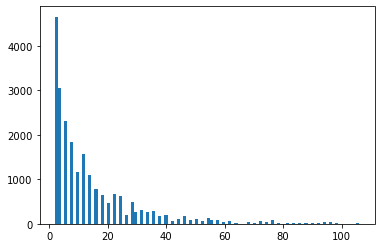

In [57]:
#(df_biba['month'] == 4) & (df_biba['year'] == 2018)
plt.hist(df_biba.loc[:, 'historic_weekday_2'], bins = 100)
plt.show()

In [56]:
df_biba[df_biba.loc[:, 'historic_weekday_2'].isna()==False]

,external_id,month,year,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,...,historic_tube_count_comb,monthly_overhang_count_comb,historic_overhang_count_comb,monthly_bridge_count_comb,historic_bridge_count_comb,monthly_swing_count_comb,historic_swing_count_comb,historic_obsta_count_comb,historic_slides_count_comb,historic_crawls_count_comb
0,1807558,9,2018,0,0,0,0.000000e+00,0.000000,0.000000,0.000000,...,2.0,0,0.0,0,6.0,0,6.0,0.0,0.0,0.0
2,MR00096403,9,2018,0,0,0,0.000000e+00,0.000000,0.000000,0.000000,...,20.0,0,10.0,0,6.0,0,8.0,0.0,0.0,0.0
6,MR00102999,12,2018,0,0,0,0.000000e+00,0.000000,0.000000,0.000000,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
7,38a275b3-cef5-4fa1-80bc-a096b1f17e78,12,2018,0,0,0,0.000000e+00,0.000000,0.000000,0.000000,...,44.0,0,52.0,0,26.0,0,112.0,0.0,0.0,0.0
10,7abc278f-9536-4d42-aab2-f5db5eb584bd,12,2018,0,0,0,0.000000e+00,0.000000,0.000000,0.000000,...,28.0,0,6.0,0,46.0,0,62.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50109,2173d277-3de5-40d8-b043-3ed5d214d573,5,2019,17,3,14,6.172353e+05,270352.941176,111647.058824,0.000000,...,124.0,1,16.0,0,50.0,4,114.0,0.0,0.0,0.0
50110,MR00101459,10,2018,0,0,0,0.000000e+00,0.000000,0.000000,0.000000,...,16.0,0,12.0,0,18.0,0,10.0,0.0,0.0,0.0
50113,fd1b01e4-f002-4279-9c00-beeb26af5aa2,10,2018,0,0,0,0.000000e+00,0.000000,0.000000,0.000000,...,88.0,0,88.0,0,54.0,0,94.0,0.0,0.0,0.0
50114,MR00095454,10,2018,33,4,29,1.208242e+06,38727.272727,155696.969697,157333.333333,...,444.0,3,256.0,3,480.0,8,784.0,0.0,0.0,0.0


In [60]:
fill_rate = df_biba.describe().loc['count',:] / len(df_biba)

fill_rate[fill_rate < 1].sort_values().head(20)

historic_count_tube                      0.000798
historic_count_spinner                   0.001197
historic_count_pull_under                0.001197
historic_count_overhang                  0.001197
historic_count_in_crawls_90tube          0.001995
historic_count_in_obsta_punchbag         0.002394
historic_count_zipline                   0.002394
historic_count_in_obsta_ball             0.002394
historic_count_in_obsta_horiz_squeeze    0.002793
historic_count_in_crawls_cave            0.003192
historic_count_climber                   0.003591
historic_count_in_obsta_vert_squeeze     0.003591
historic_count_swing                     0.003591
historic_count_ramp                      0.003990
historic_count_in_climbs_tube            0.004389
historic_count_in_crawls_tube            0.004789
historic_count_in_climbs_moon            0.004789
historic_hour_4                          0.004789
historic_count_in_slides_tube            0.005188
historic_count_in_obsta_pendulum         0.005188
